## Simple linear regression model - universal

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [234]:
def linreg(df, visual='yes', tsize = 0.33):
    global dic
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    X = df.iloc[:, :1].values
    y = df.iloc[:,1].values
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = tsize, random_state = 0)
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    regline = reg.predict(X_train)
    yrs = input('Query data: ')
    yrs = float(yrs)
    if yrs == 0:
        y_pred = reg.predict(X_test)
    else:
        y_pred = reg.predict(yrs)
        print('Calculated data at %d query value: £ %d' % (yrs,y_pred))
        
    dic = {'X_train': X_train,
           'X_test': X_test,
           'y_train': y_train,
           'y_test': y_test,
           'years': yrs,
           'y_pred': y_pred,
           'regline': regline
          }
    
    if visual == 'yes':
        display(dic)
    return dic


def display(dic=dic):
    try:
        if dic['years'] == 0.0:
            dic['years'] = dic['X_test']
    except: pass
    ttl = input('Title: ')
    x_label = input('X axis name: ')
    y_label = input('Y axis name: ')
    
    plt.scatter(dic['X_train'],dic['y_train'], color='grey')
    plt.plot(dic['X_train'], dic['regline'], color = 'blue')
    plt.scatter(dic['years'], dic['y_pred'], color = 'red')
    plt.legend(['regression line','Data points','Calculated value'])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(ttl)
    plt.show()

### Import and check the data

In [62]:
df = pd.read_csv('Salary_Data.csv', 'r', delimiter = ',')

In [63]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [64]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Run the test and visualise the result

Query data 15
Calculated data at 15 query value: £ 167005
Title: Salary vs experience
X axis name: Years
Y axis name: Salary


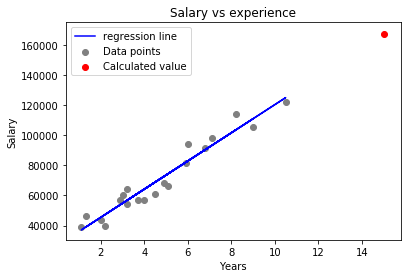

In [235]:
linreg(df);